<a href="https://colab.research.google.com/github/CMAZ83/pgd-aiml/blob/main/ML_Chronic_Kidney_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is taken over 2-month period in India. It has 400 rows with 26 features like red blood cells,
pedal edema, sugar, etc.

1. Load the data, check its shape and check for null values, check unique values for
categorical feature, Convert features into appropriate data type - Beginner
2. Convert categorical to numerical feature using Label Encoder - Intermediate
3. Plot and analyze Correlation - Beginner
4. Split the dataset for training and testing - Beginner
1. Perform Grid Search cross validation also perform prediction using the best model -
Intermediate
2. Evaluate the model using classiÞcation report and confusion matrix - Beginner

In [19]:
!wget https://www.dropbox.com/s/hd1jir21dmlgh27/kidney_disease.csv

--2022-04-01 15:48:46--  https://www.dropbox.com/s/hd1jir21dmlgh27/kidney_disease.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hd1jir21dmlgh27/kidney_disease.csv [following]
--2022-04-01 15:48:46--  https://www.dropbox.com/s/raw/hd1jir21dmlgh27/kidney_disease.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc393a5f7b8c33ffefbdcd5a68ac.dl.dropboxusercontent.com/cd/0/inline/BikNzhaKzmLOOeAJVAacXA8j-6Ben9XmNkCMNyePZGKl90ZZEM2RPncVJW58-vyISDcDogiRzH3EIuz8J7KDM5hvwzFojxd4cKo-0V6xKO-5IgjdfmtUpORhG6lPST-uOzbqJ89yeFIU2F2LALAwrA1sUsYuoqndfWcQIUdkzyhPbA/file# [following]
--2022-04-01 15:48:46--  https://uc393a5f7b8c33ffefbdcd5a68ac.dl.dropboxusercontent.com/cd/0/inline/BikNzhaKzmLOOeAJVAacXA8j-6Ben9XmNkCMNyePZGKl90ZZEM

Load the data in a pandas DataFrame
Have a look at the Þrst Þve rows
Check if the dataset contains any null values
Check the shape of the dataset
Check the unique values of the categorical columns
Check the data-types of all the columns
Convert features to appropriate data-types

In [20]:
import pandas as pd
data=pd.read_csv('kidney_disease.csv')
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [21]:
data.shape

(400, 26)

In [22]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [24]:
data.pcc.unique()

array(['notpresent', 'present', nan], dtype=object)

In [25]:
clean_df=data.dropna()

In [26]:
clean_df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [27]:
clean_df.shape

(158, 26)

In [28]:
clean_df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [29]:
clean_df['pcv']=clean_df['pcv'].astype(float)
clean_df['rc']=clean_df['rc'].astype(float)
clean_df['wc']=clean_df['wc'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [30]:
clean_df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

Convert all the categorical features to numerical values using Label Encoder from sklearn

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in clean_df.columns:
  if clean_df[i].dtype=='object':
    clean_df[i]=le.fit_transform(clean_df[i])
clean_df.head()    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
9,9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,...,29.0,12100.0,3.7,1,1,0,1,0,1,0
11,11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,...,32.0,4500.0,3.8,1,1,0,1,1,0,0
14,14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,...,16.0,11000.0,2.6,1,1,1,1,1,0,0
20,20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,...,24.0,9200.0,3.2,1,1,1,1,1,1,0


Plot the correlation and tell which feature will help the most
while prediction

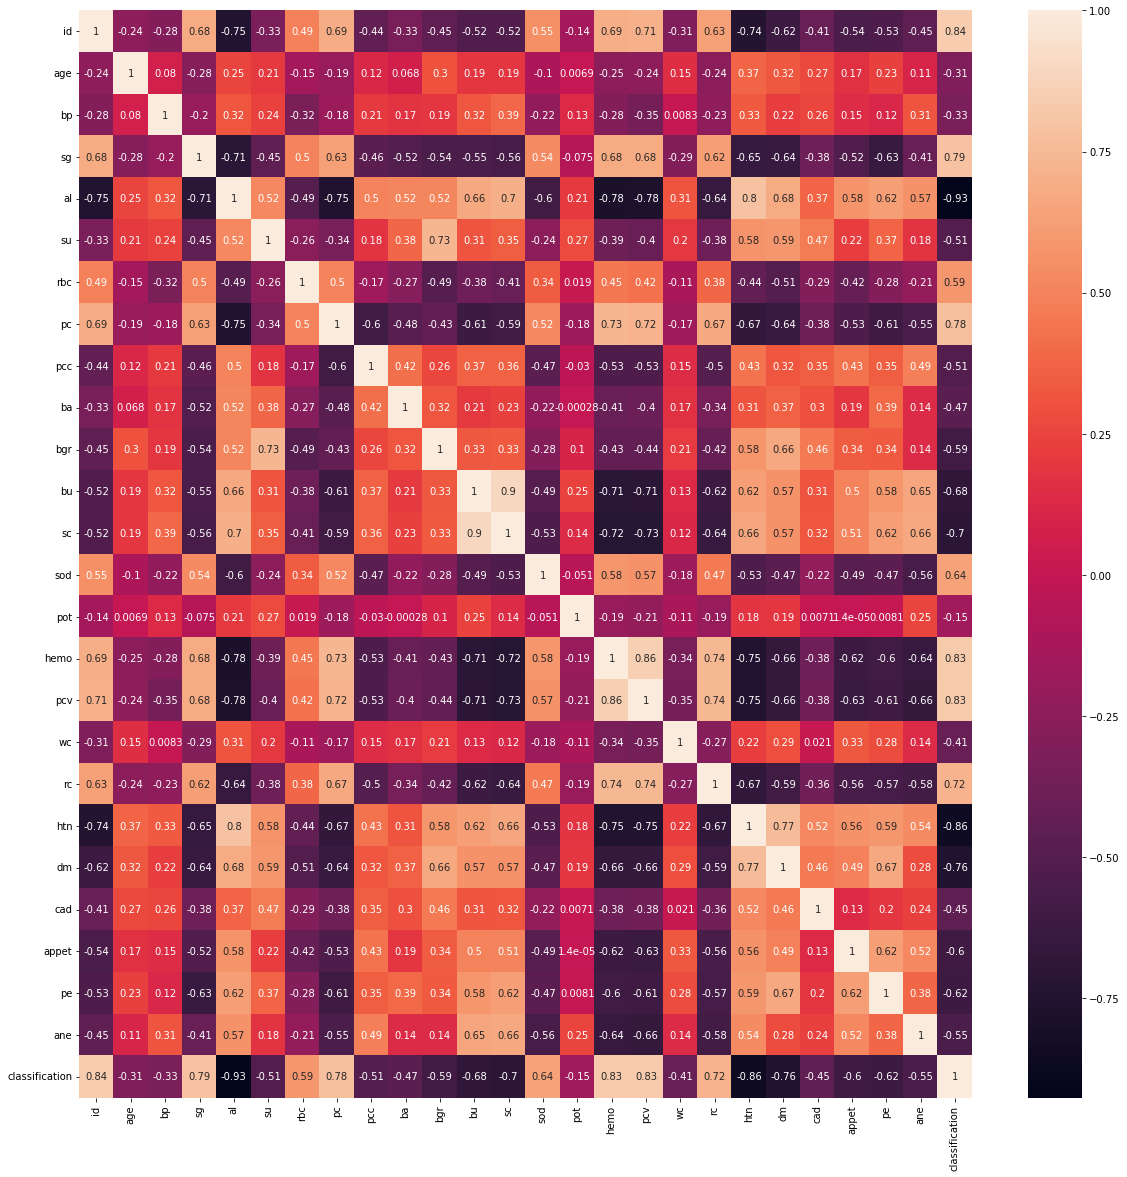

In [33]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, ax=plt.subplots(figsize=(20,20))
correlation=clean_df.corr()
sns.heatmap(correlation, annot=True, ax=ax)

Split the dataset using sklearn, with 30% for testing with random_state=1

In [34]:
from sklearn.model_selection import train_test_split
x=clean_df.drop(columns=['classification'], axis=1)
y=clean_df['classification']
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.30, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(110, 25)
(48, 25)
(110,)
(48,)


Perform Grid Search cross validation to Þnd the best
parameters for Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
model=DecisionTreeClassifier(random_state=7)
model_params={'criterion':['gini', 'entropy'], 'max_depth':range(3,25), 'max_features':range(4,22)}
model_cv=GridSearchCV(model,model_params,cv=5,n_jobs=-1,verbose=True)
model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 792 candidates, totalling 3960 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=7), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 25),
                         'max_features': range(4, 22)},
             verbose=True)

In [36]:
model_cv.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features=4, random_state=7)

In [37]:
model_cv.best_score_

0.990909090909091

In [38]:
model_cv.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_features': 4}

In [39]:
y_pred=model_cv.predict(x_test)

Evaluate the model using confusion matrix.

Evaluate the model using classiÞcation report

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[13  0]
 [ 0 35]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        35

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48

